In [1]:
import numpy as np # library to handle data in a vectorized manner
from bs4 import BeautifulSoup
import pandas as pd # library for data analsysis
import requests # library to handle requests
from geopy.geocoders import Nominatim
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.colors import rgb2hex
from sklearn.cluster import KMeans
import folium
import math
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import json
from pandas.io.json import json_normalize

Reading the Data from CSV

In [2]:
data = pd.read_csv("E:\Courses\IBM Data Science Professional Certificate\Course 9 - Applied Data Science Capstone\Dataset_Capstone.csv", index_col=0)

In [3]:
data

,District,Code,Area,Population,Population_Density,Latitude,Longitude
1,Ariyalur,AR,1949.31,"754,894",390,11.076036,79.117455
2,Chengalpattu,CGL,"2,944.96","2,556,244",868,12.684089,79.983637
3,Chennai,CH,426,"4,646,732","26,076",13.083694,80.270186
4,Coimbatore,CO,"4,723","3,458,045",732,11.001812,76.962843
5,Cuddalore,CU,"3,703","2,605,914",709,11.756433,79.763464
6,Dharmapuri,DH,"4,497.77","1,506,843",335,12.096805,78.193043
7,Dindigul,DI,"6,266.64","2,159,775",345,10.330330,78.067398
8,Erode,ER,"5,722","2,251,744",394,11.369204,77.676627
9,Kallakurichi,KL,"3,520.37","1,370,281",389,11.740626,78.963713
10,Kanchipuram,KC,"1,655.94","1,166,401",704,12.836393,79.705330


Getting Co-ordinates of the state

In [4]:
geolocator = Nominatim(user_agent="my_user_agent")
location = geolocator.geocode("Tamil Nadu")
latitude = location.latitude
longitude = location.longitude

In [5]:
# map of State using latitude and longitude values
map_state = folium.Map(location=[latitude, longitude], zoom_start=7)

# add markers to map
for lat, lng, district in zip(data['Latitude'], data['Longitude'], data['District']):
    label = '{}, Tamil Nadu'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_state)  
    
map_state

### Foursquare API

In [7]:
url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)

category_results = requests.get(url).json()
category_results

{'meta': {'code': 200, 'requestId': '6073295097f37126590aa7dc'},
 'response': {'categories': [{'id': '4d4b7104d754a06370d81259',
    'name': 'Arts & Entertainment',
    'pluralName': 'Arts & Entertainment',
    'shortName': 'Arts & Entertainment',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
     'suffix': '.png'},
    'categories': [{'id': '56aa371be4b08b9a8d5734db',
      'name': 'Amphitheater',
      'pluralName': 'Amphitheaters',
      'shortName': 'Amphitheater',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
       'suffix': '.png'},
      'categories': []},
     {'id': '4fceea171983d5d06c3e9823',
      'name': 'Aquarium',
      'pluralName': 'Aquariums',
      'shortName': 'Aquarium',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/aquarium_',
       'suffix': '.png'},
      'categories': []},
     {'id': '4bf58dd8d48988d1e1931735',
      'name': 'A

In [8]:
#Lets check number of main categories and sub-categories present in Foursquare API

categories = len(category_results['response']['categories'])

for i in range(categories):
    venues = category_results['response']['categories'][i]['name']
    print(venues)
    for j in range(len(category_results['response']['categories'][i]['categories'])):
        sub_venues = category_results['response']['categories'][i]['categories'][j]['name']
        print('\t\t' + sub_venues)

Arts & Entertainment
		Amphitheater
		Aquarium
		Arcade
		Art Gallery
		Bowling Alley
		Casino
		Circus
		Comedy Club
		Concert Hall
		Country Dance Club
		Disc Golf
		Escape Room
		Exhibit
		General Entertainment
		Go Kart Track
		Historic Site
		Karaoke Box
		Laser Tag
		Memorial Site
		Mini Golf
		Movie Theater
		Museum
		Music Venue
		Pachinko Parlor
		Performing Arts Venue
		Pool Hall
		Public Art
		Racecourse
		Racetrack
		Roller Rink
		Salsa Club
		Samba School
		Stadium
		Theme Park
		Tour Provider
		VR Cafe
		Water Park
		Zoo
College & University
		College Academic Building
		College Administrative Building
		College Auditorium
		College Bookstore
		College Cafeteria
		College Classroom
		College Gym
		College Lab
		College Library
		College Quad
		College Rec Center
		College Residence Hall
		College Stadium
		College Theater
		Community College
		Fraternity House
		General College & University
		Law School
		Medical School
		Sorority House
		Student Center
		Trade School
		U

Assigning numbers to Categories

In [9]:
all_categories = {}

for i in range(categories):
    venues = category_results['response']['categories'][i]['name']
    all_categories[venues] = i

print(all_categories)

{'Arts & Entertainment': 0, 'College & University': 1, 'Event': 2, 'Food': 3, 'Nightlife Spot': 4, 'Outdoors & Recreation': 5, 'Professional & Other Places': 6, 'Residence': 7, 'Shop & Service': 8, 'Travel & Transport': 9}


In [10]:
tourist_category = []
business_category = []
tour_category = ['Nightlife Spot', 'Outdoors & Recreation']
bus_category = ['Food', 'Shop & Service', 'Travel & Transport']


for i in tour_category:
    key = all_categories.get(i)
    venues = category_results['response']['categories'][key]['name']
    tourist_category.append(venues)
    for j in range(len(category_results['response']['categories'][key]['categories'])):
        sub_venues = category_results['response']['categories'][key]['categories'][j]['name']
        tourist_category.append(sub_venues)

for i in bus_category:
    key = all_categories.get(i)
    venues = category_results['response']['categories'][key]['name']
    business_category.append(venues)
    for j in range(len(category_results['response']['categories'][key]['categories'])):
        sub_venues = category_results['response']['categories'][key]['categories'][j]['name']
        business_category.append(sub_venues)

#### Function to get the nearby venues of all the districts in the State

In [11]:
LIMIT = 25

def getNearbyVenues_tourist(names, latitudes, longitudes, radius=50000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    nearby_venues = nearby_venues[nearby_venues['Venue Category'].isin(tourist_category)]
    
    return(nearby_venues)

In [12]:
venues = getNearbyVenues_tourist(names=data['District'],
                                   latitudes=data['Latitude'],
                                   longitudes=data['Longitude']
                                  )
venues

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
2,Ariyalur,11.076036,79.117455,Maha Magam Tank,10.956496,79.381546,Pool
7,Ariyalur,11.076036,79.117455,Gangai Konda Chozhapuram,11.206286,79.449432,Garden
29,Chengalpattu,12.684089,79.983637,Krishna's Butter Ball,12.618988,80.192722,Sculpture Garden
35,Chengalpattu,12.684089,79.983637,Mahabalipuram,12.861927,80.228115,Beach
53,Chennai,13.083694,80.270186,Anna Nagar Tower Park,13.086571,80.213627,Park
...,...,...,...,...,...,...,...
708,Viluppuram,11.913787,79.507893,Paradise Beach,11.875693,79.820578,Beach
718,Viluppuram,11.913787,79.507893,Promenade Beach,11.932650,79.836295,Beach
721,Viluppuram,11.913787,79.507893,Zest Private Beach,11.805728,79.797210,Beach
724,Viluppuram,11.913787,79.507893,Bharathi Park,11.932934,79.834294,Park


In [13]:
no_venues_in_district = venues.groupby('District', as_index=False).count()[['District', 'Venue']]

no_venues_in_district.rename(columns={'Venue':'No of Venues'}, inplace=True)
no_venues_in_district

,District,No of Venues
0,Ariyalur,2
1,Chengalpattu,2
2,Chennai,3
3,Coimbatore,3
4,Cuddalore,5
5,Dharmapuri,3
6,Erode,1
7,Kanniyakumari,6
8,Mayiladuthurai,4
9,Nagapattinam,2


Printing the result

### Number of Venues in each districts

<BarContainer object of 21 artists>

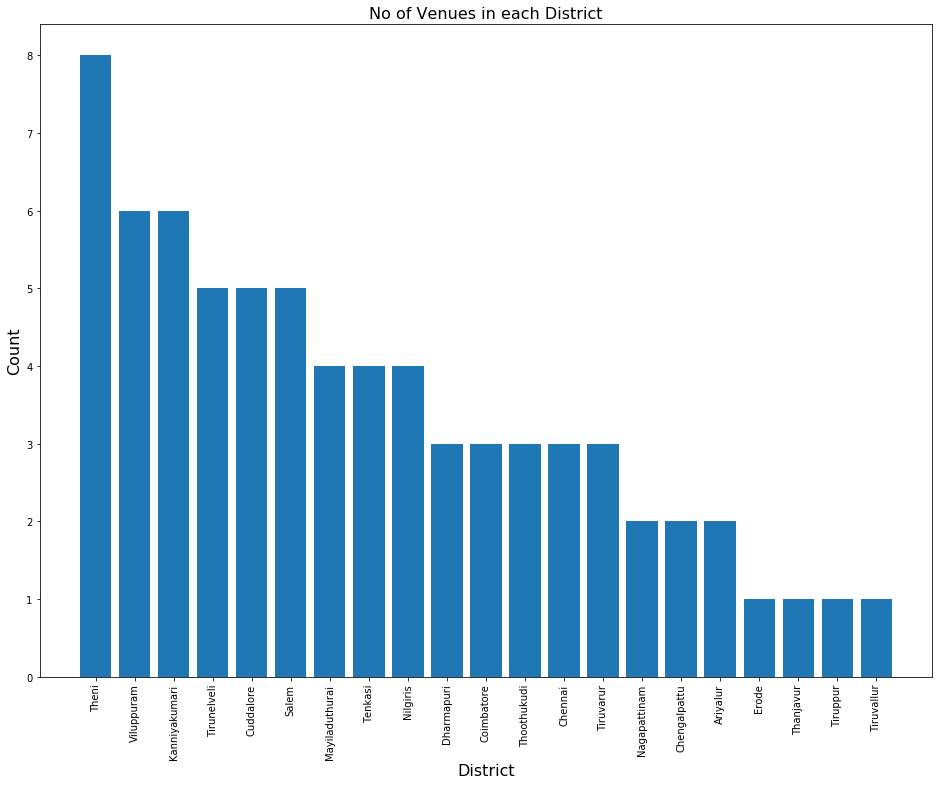

In [14]:
no_venues_in_district.sort_values('No of Venues', ascending=False, inplace=True)
count_venues = no_venues_in_district['No of Venues']
district = no_venues_in_district['District']

plt.figure(figsize = (16, 12))
plt.xticks(rotation = 90)
plt.xlabel("District", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("No of Venues in each District", fontsize = 16)
plt.bar(district, count_venues.values)

__Unique categories curated from all the returned venues__

In [15]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

There are 19 uniques categories.


### Getting Nearby Business

In [18]:
LIMIT = 25

def getNearbyBusiness(names, latitudes, longitudes, radius=500):
    
    business_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby business
        business_list.append([(name,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_business = pd.DataFrame([item for business_list in business_list for item in business_list])
    nearby_business.columns = ['Venue',
                    'Business', 
                  'BLatitude', 
                  'BLongitude', 
                  'Business Category']
    
    nearby_business = nearby_business[nearby_business['Business Category'].isin(business_category)]
    
    return(nearby_business)

In [19]:
nearby_business = getNearbyBusiness(names=venues['Venue'],
                                   latitudes=venues['Venue Latitude'],
                                   longitudes=venues['Venue Longitude']
                                  )
nearby_business

,Venue,Business,BLatitude,BLongitude,Business Category
1,Maha Magam Tank,Hotel Raya's,10.957723,79.380810,Hotel
2,Maha Magam Tank,Rayas Grand,10.956523,79.380908,Hotel
3,Maha Magam Tank,Rathimeena Travels - KMU,10.958472,79.381596,Bus Station
8,Krishna's Butter Ball,Mamalla Heritage Hotel Tamil Nadu,12.618603,80.193797,Indian Restaurant
10,Krishna's Butter Ball,Moonrakers,12.619642,80.196394,Seafood Restaurant
...,...,...,...,...,...
583,Bharathi Park,Le Chateau,11.928759,79.833679,French Restaurant
585,Bharathi Park,Kasha Ki Aasha,11.930277,79.831313,Café
586,Bharathi Park,Nilgiris Supermarket,11.934763,79.830949,Department Store
588,Serenity Beach,Bodhi Cafe,11.971132,79.844410,Café


In [20]:
no_nearby_business = nearby_business.groupby('Business Category', as_index=False).count()[['Business Category','Business']]
no_nearby_business.rename(columns={'Business':'No of Businesses'}, inplace=True)
no_nearby_business

,Business Category,No of Businesses
0,ATM,2
1,American Restaurant,3
2,Asian Restaurant,9
3,Bakery,18
4,Bistro,4
5,Boat or Ferry,4
6,Bookstore,6
7,Breakfast Spot,3
8,Bubble Tea Shop,2
9,Burger Joint,4


In [21]:
print('There are {} uniques categories.'.format(len(nearby_business['Business Category'].unique())))

There are 48 uniques categories.


__One hot Encoding__

In [22]:
# one hot encoding
nearby_business_onehot = pd.get_dummies(nearby_business[['Business Category']], prefix="", prefix_sep="")

# add venue column back to dataframe
nearby_business_onehot['Venue'] = nearby_business['Venue'] 

# move venue column to the first column
fixed_columns = [nearby_business_onehot.columns[-1]] + list(nearby_business_onehot.columns[:-1])
nearby_business_onehot = nearby_business_onehot[fixed_columns]

print(nearby_business_onehot.shape)
nearby_business_onehot.head()

(343, 49)


,Venue,ATM,American Restaurant,Asian Restaurant,Bakery,Bistro,Boat or Ferry,Bookstore,Breakfast Spot,Bubble Tea Shop,...,Restaurant,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shop & Service,Shopping Mall,Snack Place,Steakhouse,Train Station,Vegetarian / Vegan Restaurant
1,Maha Magam Tank,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Maha Magam Tank,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Maha Magam Tank,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Krishna's Butter Ball,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,Krishna's Butter Ball,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [23]:
nearby_business_grouped = nearby_business_onehot.groupby('Venue').mean().reset_index()
print(nearby_business_grouped.shape)
nearby_business_grouped

(40, 49)


,Venue,ATM,American Restaurant,Asian Restaurant,Bakery,Bistro,Boat or Ferry,Bookstore,Breakfast Spot,Bubble Tea Shop,...,Restaurant,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shop & Service,Shopping Mall,Snack Place,Steakhouse,Train Station,Vegetarian / Vegan Restaurant
0,Anna Nagar Tower Park,0.000000,0.000000,0.062500,0.062500,0.062500,0.000000,0.062500,0.000000,0.0,...,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.0625,0.000000,0.000000,0.062500
1,Bharathi Park,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.0000,0.000000,0.000000,0.055556
2,Blend - The High Energy Bar,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.105263,0.052632,0.0,...,0.000000,0.0,0.052632,0.00,0.000000,0.052632,0.0000,0.052632,0.000000,0.000000
3,Bryant Park,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
4,Bush's Pasture Park,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
5,Coaker's Walk,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
6,Coonoor,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.0000,0.000000,0.333333,0.000000
7,Courtallam,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.2,...,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
8,Decathlon,0.333333,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
9,Eral,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.250000,0.0,0.000000,0.00,0.000000,0.000000,0.0000,0.000000,0.000000,0.250000


__Top 5 Common businesses__

In [24]:
num_top_business = 5

for hood in nearby_business_grouped['Venue']:
    print("----"+hood+"----")
    temp = nearby_business_grouped[nearby_business_grouped['Venue'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_business))
    print('\n')

----Anna Nagar Tower Park----
                           venue  freq
0              Indian Restaurant  0.19
1  Vegetarian / Vegan Restaurant  0.06
2                    Snack Place  0.06
3           Fast Food Restaurant  0.06
4              Electronics Store  0.06


----Bharathi Park----
               venue  freq
0        Coffee Shop  0.17
1              Hotel  0.17
2               Café  0.11
3  Indian Restaurant  0.11
4             Bakery  0.11


----Blend - The High Energy Bar----
            venue  freq
0  Clothing Store  0.21
1           Hotel  0.16
2       Bookstore  0.11
3       Juice Bar  0.11
4  Sandwich Place  0.05


----Bryant Park----
                  venue  freq
0                 Hotel  0.22
1     Indian Restaurant  0.11
2                Bakery  0.11
3  Fast Food Restaurant  0.11
4           Bus Station  0.11


----Bush's Pasture Park----
                 venue  freq
0  American Restaurant   1.0
1                  ATM   0.0
2    Indian Restaurant   0.0
3   Italian Restaura

__Putting in Pandas__

In [25]:
#function to sort the business in descending order

def return_most_common_business(row, num_top_business):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_business]

In [26]:
num_top_business = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top business
columns = ['Venue']
for ind in np.arange(num_top_business):
    try:
        columns.append('{}{} Most Common Business'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Business'.format(ind+1))

# create a new dataframe
nearby_business_sorted = pd.DataFrame(columns=columns)
nearby_business_sorted['Venue'] = nearby_business_grouped['Venue']

for ind in np.arange(nearby_business_grouped.shape[0]):
    nearby_business_sorted.iloc[ind, 1:] = return_most_common_business(nearby_business_grouped.iloc[ind, :], num_top_business)

nearby_business_sorted.head()

,Venue,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
0,Anna Nagar Tower Park,Indian Restaurant,Vegetarian / Vegan Restaurant,Burger Joint,Juice Bar,Market,Coffee Shop,Clothing Store,Fast Food Restaurant,Electronics Store,Asian Restaurant
1,Bharathi Park,Coffee Shop,Hotel,Pizza Place,Bakery,Café,Indian Restaurant,Vegetarian / Vegan Restaurant,Department Store,Italian Restaurant,French Restaurant
2,Blend - The High Energy Bar,Clothing Store,Hotel,Bookstore,Juice Bar,Steakhouse,Shopping Mall,Sandwich Place,Indian Restaurant,Breakfast Spot,Coffee Shop
3,Bryant Park,Hotel,Bakery,Indian Restaurant,Pizza Place,Bus Station,Fast Food Restaurant,Modern European Restaurant,Café,Vegetarian / Vegan Restaurant,Clothing Store
4,Bush's Pasture Park,American Restaurant,Vegetarian / Vegan Restaurant,Café,Fast Food Restaurant,Electronics Store,Donut Shop,Diner,Dessert Shop,Department Store,Cosmetics Shop


# Clustering

### Finding optimal k value

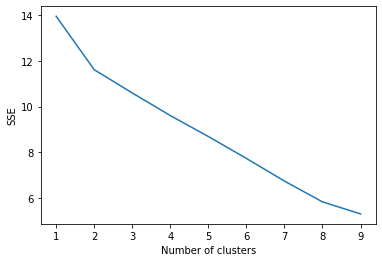

In [27]:
sse = {}
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(nearby_business_grouped.drop('Venue',axis=1))
    nearby_business_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In [28]:
# set number of clusters
kclusters = 3

nearby_business_grouped_clustering = nearby_business_grouped.drop('Venue', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nearby_business_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [29]:
#create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

# add clustering labels
nearby_business_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

nearby_business_merged = nearby_business[['Venue']]
new_venues = venues[['Venue', 'Venue Latitude', 'Venue Longitude']]

nearby_business_merged = nearby_business_merged.join(new_venues.set_index('Venue'), on='Venue')

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
nearby_business_merged = nearby_business_merged.join(nearby_business_sorted.set_index('Venue'), on='Venue')

nearby_business_merged.drop_duplicates(subset='Venue', keep='first', inplace=True)
nearby_business_merged

,Venue,Venue Latitude,Venue Longitude,Cluster Labels,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
1,Maha Magam Tank,10.956496,79.381546,2,Hotel,Bus Station,Vegetarian / Vegan Restaurant,Café,Electronics Store,Donut Shop,Diner,Dessert Shop,Department Store,Cosmetics Shop
8,Krishna's Butter Ball,12.618988,80.192722,2,Burger Joint,Indian Restaurant,Seafood Restaurant,Restaurant,Bus Stop,Donut Shop,Diner,Dessert Shop,Department Store,Cosmetics Shop
15,Mahabalipuram,12.861927,80.228115,2,Restaurant,Fast Food Restaurant,Breakfast Spot,Café,Bus Stop,Electronics Store,Donut Shop,Diner,Dessert Shop,Department Store
23,Anna Nagar Tower Park,13.086571,80.213627,2,Indian Restaurant,Vegetarian / Vegan Restaurant,Burger Joint,Juice Bar,Market,Coffee Shop,Clothing Store,Fast Food Restaurant,Electronics Store,Asian Restaurant
49,Blend - The High Energy Bar,13.061581,80.264448,2,Clothing Store,Hotel,Bookstore,Juice Bar,Steakhouse,Shopping Mall,Sandwich Place,Indian Restaurant,Breakfast Spot,Coffee Shop
73,Marina Beach | மெரினா கடற்கரை (Marina Beach),13.047663,80.280698,1,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Train Station,Electronics Store,Donut Shop,Diner,Dessert Shop,Department Store,Cosmetics Shop,Coffee Shop
79,Decathlon,11.057308,77.079576,2,ATM,Bakery,Italian Restaurant,Café,Electronics Store,Donut Shop,Diner,Dessert Shop,Department Store,Cosmetics Shop
83,Race Course Road,11.003251,76.977253,2,Department Store,Vegetarian / Vegan Restaurant,Asian Restaurant,Hotel,Bistro,Indian Restaurant,Dessert Shop,Restaurant,Fast Food Restaurant,Coffee Shop
98,Tease,11.002038,76.973687,2,Bakery,Indian Restaurant,Coffee Shop,Vegetarian / Vegan Restaurant,Hotel,Department Store,Bistro,Pizza Place,Restaurant,Sandwich Place
124,Zest Private Beach,11.805728,79.797210,1,Coffee Shop,Vegetarian / Vegan Restaurant,Train Station,Fast Food Restaurant,Electronics Store,Donut Shop,Diner,Dessert Shop,Department Store,Cosmetics Shop


### Visualizing the Clusters

In [30]:
#visualize the resulting clusters

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=7)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nearby_business_merged['Venue Latitude'], nearby_business_merged['Venue Longitude'], nearby_business_merged['Venue'], nearby_business_merged['Cluster Labels']):
    if (not math.isnan(cluster)) and (not math.isnan(lat)) and (not math.isnan(lon)):
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon], radius=5, popup=label, color=rainbow[int(cluster)], fill=True, fill_opacity=0.7).add_to(map_clusters)

map_clusters

### Clusters and Businesses in each cluster

__Cluster 1__

In [31]:
nearby_business_merged.loc[nearby_business_merged['Cluster Labels'] == 0, nearby_business_merged.columns[[0] + list(range(4, nearby_business_merged.shape[1]))]]

,Venue,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
252,Thirparappu Falls,Bus Station,Vegetarian / Vegan Restaurant,Café,Fast Food Restaurant,Electronics Store,Donut Shop,Diner,Dessert Shop,Department Store,Cosmetics Shop
258,Karaikal Beach,Indian Restaurant,Vegetarian / Vegan Restaurant,Flower Shop,Electronics Store,Donut Shop,Diner,Dessert Shop,Department Store,Cosmetics Shop,Coffee Shop
268,Velankanni Beach,Vegetarian / Vegan Restaurant,Indian Restaurant,Flower Shop,Electronics Store,Donut Shop,Diner,Dessert Shop,Department Store,Cosmetics Shop,Coffee Shop
327,Thompson Brewery & Public House,Other Repair Shop,Salon / Barbershop,Bus Station,Electronics Store,Donut Shop,Diner,Dessert Shop,Department Store,Cosmetics Shop,Coffee Shop


__Cluster 2__

In [32]:
nearby_business_merged.loc[nearby_business_merged['Cluster Labels'] == 1, nearby_business_merged.columns[[0] + list(range(4, nearby_business_merged.shape[1]))]]

,Venue,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
73,Marina Beach | மெரினா கடற்கரை (Marina Beach),Fast Food Restaurant,Vegetarian / Vegan Restaurant,Train Station,Electronics Store,Donut Shop,Diner,Dessert Shop,Department Store,Cosmetics Shop,Coffee Shop
124,Zest Private Beach,Coffee Shop,Vegetarian / Vegan Restaurant,Train Station,Fast Food Restaurant,Electronics Store,Donut Shop,Diner,Dessert Shop,Department Store,Cosmetics Shop
209,Thindal,Motorcycle Shop,Vegetarian / Vegan Restaurant,Flower Shop,Electronics Store,Donut Shop,Diner,Dessert Shop,Department Store,Cosmetics Shop,Coffee Shop


__Cluster 3__

In [33]:
nearby_business_merged.loc[nearby_business_merged['Cluster Labels'] == 2, nearby_business_merged.columns[[0] + list(range(4, nearby_business_merged.shape[1]))]]

,Venue,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
1,Maha Magam Tank,Hotel,Bus Station,Vegetarian / Vegan Restaurant,Café,Electronics Store,Donut Shop,Diner,Dessert Shop,Department Store,Cosmetics Shop
8,Krishna's Butter Ball,Burger Joint,Indian Restaurant,Seafood Restaurant,Restaurant,Bus Stop,Donut Shop,Diner,Dessert Shop,Department Store,Cosmetics Shop
15,Mahabalipuram,Restaurant,Fast Food Restaurant,Breakfast Spot,Café,Bus Stop,Electronics Store,Donut Shop,Diner,Dessert Shop,Department Store
23,Anna Nagar Tower Park,Indian Restaurant,Vegetarian / Vegan Restaurant,Burger Joint,Juice Bar,Market,Coffee Shop,Clothing Store,Fast Food Restaurant,Electronics Store,Asian Restaurant
49,Blend - The High Energy Bar,Clothing Store,Hotel,Bookstore,Juice Bar,Steakhouse,Shopping Mall,Sandwich Place,Indian Restaurant,Breakfast Spot,Coffee Shop
79,Decathlon,ATM,Bakery,Italian Restaurant,Café,Electronics Store,Donut Shop,Diner,Dessert Shop,Department Store,Cosmetics Shop
83,Race Course Road,Department Store,Vegetarian / Vegan Restaurant,Asian Restaurant,Hotel,Bistro,Indian Restaurant,Dessert Shop,Restaurant,Fast Food Restaurant,Coffee Shop
98,Tease,Bakery,Indian Restaurant,Coffee Shop,Vegetarian / Vegan Restaurant,Hotel,Department Store,Bistro,Pizza Place,Restaurant,Sandwich Place
127,Pondicherry Rock Beach,Hotel,Restaurant,French Restaurant,Pizza Place,Diner,Coffee Shop,Café,Bus Stop,Donut Shop,Dessert Shop
149,Promenade Beach,Hotel,Coffee Shop,Asian Restaurant,Bakery,Vegetarian / Vegan Restaurant,Indian Restaurant,Café,Fast Food Restaurant,French Restaurant,Restaurant
